In [9]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG-131] Homework 4: Visualization
<br>


## Table of Contents
1 - [Project](#project)<br>
2 - [Plotting Basics](#basics)<br>
3 - [The Data](#data)<br>
4 - [Visual EDA - Histograms, KDEs, Box Plots, Violin Plots](#eda)<br>
5 - [Scatter Plots](#scatter)<br>


## Section 1: Project<a id='project'></a>

Before we dive into the nuts and bolts of visualization, we would like you to begin thinking about the final project. 

**Question 1.1 (3 points)** Write down (at least) two prediction questions that you are interested in exploring. These can be preliminary - it's ok (and expected) if your questions change and become more refined throughout the next few weeks, especially as you begin working with your team. Make it clear that you're posing prediction problems, not inference problems.  

*YOUR ANSWER HERE*


*For Section 1, students received full credit if they completed all parts of each question.*

**Question 1.2 (2 points)** What *resource allocation* problem would your prediction model serve?  That is, what would somebody do with the information your prediction model produces?

*YOUR ANSWER HERE*

**Question 1.3** Open, complete, and submit [this Google form](https://forms.gle/8dKsJgLG5vJJUjix5). Paste your answer from Question 1.1 and 1.2 where prompted.

----

## Section 2: Plotting Basics <a id='basics'></a> 

So far we have learned how to use NumPy, Pandas, and Geopandas to manipulate and explore datasets. Now, we are going to learn how to use Python libraries matplotlib and seaborn to explore datasets visually.
By the end of this homework, you should be able to:
+ Plot and customize graphs with matplotlib and seaborn
+ Visualize distributions with histograms, kernel density estimators, box-and-whisker plots, and violin plots, and be able to explain when to use which type of plot
+ Create basic scatter plots
+ Analyze and interpret plots
+ Apply best practices when creating visualizations, including labeling titles, axes, legends, adjusting the font size, and choosing a color palette

### Dependencies

**Question 2.1 (1 point)** Import Pandas, NumPy, and matplotlib using their common pseudonyms. 

In [10]:
# YOUR CODE HERE

In [11]:
# SOLUTION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Run the cell below to import a few other packages we'll use in this homework. Note the shorthand for the seaborn package.  Seaborn is a library that works with matplotlib to make visualizations.

In [12]:
import datetime
import os
import requests
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

Before we work with the data, we are going to go over some plotting basics with a quick example. Take a look at the sample code below that plots a sine wave on two different subplots.

Note that jupyter notebooks use a typesetting language called LaTeX when we put text inside of dollar signs (for example, when we write `$x^2$` in a markdown cell, it is formatted as $x^2$).

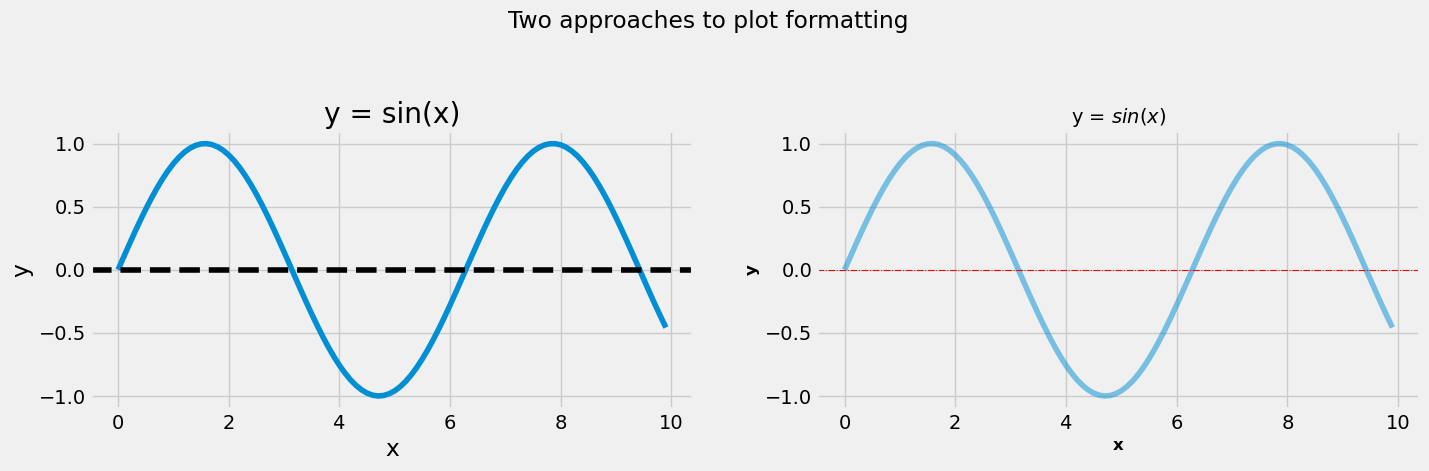

In [13]:
x = np.arange(0, 10, 0.1) # This generates a set of x-values to plug into the function
y = np.sin(x) # Outputs y-values from the sine function of x

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1) # What do each of the three arguments to plt.subplot() mean?
plt.plot(x, y) 
plt.title('y = sin(x)') 
plt.ylabel("y") 
plt.xlabel("x") 
plt.axhline(y=0, color="k", linestyle='--') 
plt.grid(True, which='both')

plt.subplot(1,2,2)
plt.plot(x, y, alpha = 0.5)     # a 
plt.title(r'y = $sin(x)$', fontsize=14)     # b 
plt.xlabel("x", fontsize = 12, weight = 'bold')     # c
plt.ylabel('y', fontsize = 12, weight = 'bold')     # c
plt.axhline(y=0, color="r", linestyle='-.', linewidth=0.75)     # d
plt.grid(True, which='both') 


plt.suptitle('Two approaches to plot formatting')

plt.tight_layout(pad = 2)

plt.show()

**Question 2.2 (2 points):** In the code above, what do each of the three arguments (i.e., inputs) to `plt.subplot` represent? You can figure this out in two ways:
1. Feel free to refer to the [matplotlib documentation on subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html). 
2. Adjust the arguments yourself to see how the plot changes.

*YOUR ANSWER HERE*

*SOLUTION*
*The first argument specifies the number of rows of subplots to include in the figure.
The second argument specifies the number of columns of subplots to include in the figure. 
The third argument specifies the index of the specific subplot we are working on. 
So, if we specify plt.subplot(1,2,1), we are working on the first (lefthand, in this case) subplot in a figure with two subplots arranged in one row with two columns.*


**Question 2.3 (2 points):** Some of the lines of code above end with a one-letter comment. These lines contain arguments that differentiate the right subplot from the left one. In the space below, describe how each line of code changes the right plot relative to the left plot. Line b has been done for you as an example.  You can learn more about the arguments in the same way that you did for Question 2.2: <br>
**a.** ... <br>
**b.** *Subplot title: Converts subtitle to LaTeX code to render mathematics notations; changes (shrinks) the default fontsize of the subplot title.* <br>
**c.** ... <br>
**d.** ... <br>

*POSSIBLE SOLUTION*

*a. Plot: Changes (reduces) the opacity of the curve*

*c. Axis labels: Changes (reduces) the fontsize of the x- and y- axes in the subplot and changes the font face to bold.*

*d. Horizontal line: Changes the horizontal line style from dashed to dash-dot. Changes (reduces) the width of the horizontal line. Makes it red.*

<br>

----
## Section 3: The Data<a id='data'></a>

In this notebook, you'll be revisiting data from the California Independent System Operator (CAISO) on renewable energy supply.<br>

For this assignment, we've downloaded data from CAISO's ["Today's Outlook" page](http://www.caiso.com/TodaysOutlook/Pages/default.aspx). You can take a look around the page and visit its different tabs to see how CAISO visualizes its daily data.<br>

To start off, we're going to make use of the function `CAISOdata()`, adapted from the `CAISOrenewables()` function that Duncan wrote for the `CAISO_data_pull.ipynb` file in Lecture 2. The function is defined below.

In [14]:
def CAISOdata(start_date, end_date, matrix = False):
    """
    Scrape CAISO's Today's Outlook daily renewables .csv files
    for the specified date range and convert to a DataFrame or 
    Numpy record array. 
    
    Parameters
    ----------
    start_date : str
        First day to scrape, in a standard datestring format. 
    end_date : str
        Last day to scrape, also in a standard datestring format. 
    matrix : bool
        If False, function will return a Pandas DataFrame. 
        If True, will return numpy recarray. 
    """
    
    base_url = 'https://www.caiso.com/outlook/SP/History/'
    tail = '/fuelsource.csv'
    
    rv = pd.DataFrame()

    dates = pd.date_range(start_date, end_date)
    
    for d in dates:
        # construct url
        str_year = str(d.year)
        str_month = str(d.month).rjust(2, '0')
        str_day = str(d.day).rjust(2, '0')
        str_ymd = str_year + str_month + str_day
        url = base_url + str_ymd + tail

        #Write scraped file to drive
        caiso_data = requests.get(url).text
        csv_filename = str_ymd + '.csv'
    
        with open(csv_filename, 'w') as f:
            f.write(str(caiso_data))
    
        #Load data to dataframe.
        data = pd.read_csv(csv_filename, delimiter=',')

        # Add date column
        data.insert(0,"Date",[d]*(data.shape[0]), allow_duplicates=True)
        
        # Make datetime column
        data['datetime_str'] = data['Date'].astype('string').str.cat(data['Time'].astype('string'), ' ')
        
        data['DateTime'] = pd.to_datetime(data['datetime_str'])
        data.drop('datetime_str', axis=1, inplace=True)

        # Append 
        rv = pd.concat([rv,data])
        
        os.remove(csv_filename)
        
    if matrix:
        return rv.to_records(index=True)
    
    return rv

Now test `CAISOdata` for the month of August, 2024.

In [15]:
# run this code
renewables_aug2024 = CAISOdata('2024-08-01','2024-08-31')
renewables_aug2024

,Date,Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,Batteries,Imports,Other,DateTime
0,2024-08-01,00:00,-8,2332,793,305,151,302,-2,2264,15009,3706,-536,4641,0,2024-08-01 00:00:00
1,2024-08-01,00:05,-8,2316,792,303,152,302,-1,2264,14965,3604,100,4281,0,2024-08-01 00:05:00
2,2024-08-01,00:10,-7,2307,792,300,152,296,-1,2263,14917,3596,375,4095,0,2024-08-01 00:10:00
3,2024-08-01,00:15,-7,2275,793,301,151,296,-2,2262,14890,3567,369,4011,0,2024-08-01 00:15:00
4,2024-08-01,00:20,-8,2265,792,303,153,295,-2,2261,14868,3555,246,4067,0,2024-08-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2024-08-31,23:35,-40,2457,742,318,162,272,0,1553,12217,3363,102,5854,0,2024-08-31 23:35:00
284,2024-08-31,23:40,-40,2444,742,318,163,272,0,1554,12227,3323,-55,5880,0,2024-08-31 23:40:00
285,2024-08-31,23:45,-40,2448,742,318,163,271,0,1554,12221,3280,-257,5961,0,2024-08-31 23:45:00
286,2024-08-31,23:50,-40,2440,741,318,163,272,0,1552,12211,3265,-619,6186,0,2024-08-31 23:50:00


**Question 3.1 (1 pt):** What is the temporal resolution of the data returned? 

*YOUR ANSWER HERE*

*Solution: 5-minute-ly data*

**Question 3.2 (2 pts):** Using the function defined above, get data for each day from September 1st, 2022 to August 31st, 2023. Your result should be a dataframe `caiso_22_23` that contains a record for every five minutes of every hour of ever day of the year covered by the date range 9/1/2022-8/31/2023. (12 x 24 x 365 = 105,120, so `caiso_22_23` should have 105120 rows).

It'll probably take a few minutes for your code to run, so you may want to try getting data for a month or two, then changing your code to grab data for all the months once you're sure it works.

If you're stuck, you can import the csv version of this dataset from the `data` folder. You'll receive one point for this problem if you take this approach.

In [16]:
# YOUR CODE HERE

In [17]:
# SOLUTION
caiso_22_23 = CAISOdata('2022-09-01','2023-08-31')

In [18]:
# alt. solution (half credit) - if you read the data from the file
# caiso_22_23 = pd.read_csv("data/caiso_2022-2023.csv", index_col = 0)
# caiso_22_23['DateTime'] = pd.to_datetime(caiso_22_23['Date'])

In [19]:
assert len(caiso_22_23) == 105120

**Question 3.3 (1pt)** Add a `Month` column and a `Year` column.  Hint: Try using the syntax `df['name'].dt.month`

In [20]:
# YOUR CODE HERE

In [21]:
# SOLUTION
caiso_22_23['Month'] = caiso_22_23['DateTime'].dt.month
caiso_22_23['Year'] = caiso_22_23['DateTime'].dt.year

In [22]:
assert caiso_22_23.shape == (105120, 18)

<br>

----

## Section 4: Visual EDA of a Single Variable - Histograms, KDEs, and Box Plots <a id='eda'></a>

There are three main types of plots that are commonly used to visualize the distribution of a single variable (e.g., column) of data: histograms, kernel density estimator (KDE) plots, and box-and-whisker plots. We're going to plot all four types and discuss the differences between them. <br>

We'll start by looking specifically at solar generation.

### Histograms.

Run the cells below.

In [23]:
caiso_22_23.columns

Index(['Date', 'Time', 'Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas',
       'Small hydro', 'Coal', 'Nuclear', 'Natural Gas', 'Large Hydro',
       'Batteries', 'Imports', 'Other', 'DateTime', 'Month', 'Year'],
      dtype='object')

In [24]:
caiso_22_23['Date'].head()

0   2022-09-01
1   2022-09-01
2   2022-09-01
3   2022-09-01
4   2022-09-01
Name: Date, dtype: datetime64[ns]

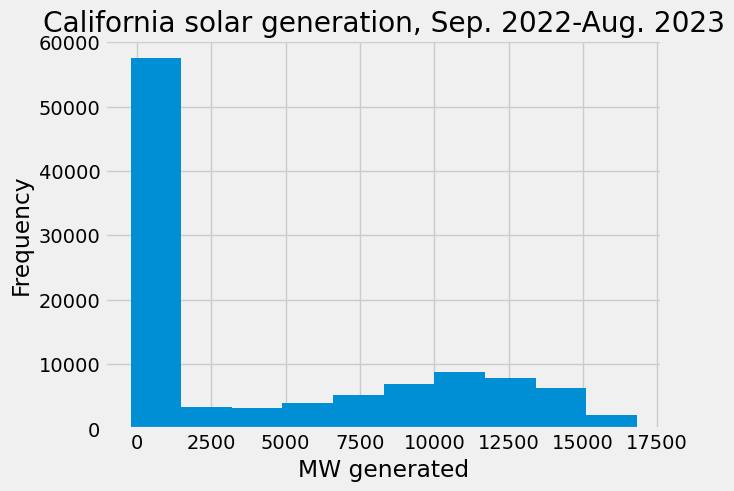

In [25]:
# Run this cell to plot a histogram of solar energy generation in 2022-23
plt.hist(caiso_22_23["Solar"])
plt.title("California solar generation, Sep. 2022-Aug. 2023")
plt.ylabel("Frequency")
plt.xlabel("MW generated")
plt.show()

### Question 4.1.1 (1 point)

Qualitatively describe what the height of each bar in the histogram represents.

*YOUR ANSWER HERE*

*The height of a bar represents the number of 5-min intervals in the year that small hydro energy generation was within a certain range (e.g., ~0-700MW for the first bar, ~700-1400MW for the second bar...)*

### Question 4.1.2 (1 point)

Notice that the largest bin of solar generation contains observations near 0. As solar generation is strongly diurnal, we expect that solar generation is consistently low at night. Let's construct a new dataframe that only includes solar data **between 6AM and 6PM** (including the first interval of the 6AM and ending with the last inerval before 6PM), with columns `Time`,`Date`,`Month`,`Year`, and `Solar`. (You may find it helpful to go through the intermediate step of getting the hour of each observation from a DateTime variable using `.dt.hour`.)

In [26]:
# YOUR CODE HERE
caiso_solar = ...

# SOLUTION
caiso_solar = caiso_22_23.loc[:,['Time','Date','Month','Year','Solar','DateTime']]
caiso_solar['Hour'] = caiso_solar['DateTime'].dt.hour
caiso_solar = caiso_solar.loc[(caiso_solar['Hour'] >= 6) & (caiso_solar['Hour'] < (12+6)),['Time','Date','Month','Year','Solar']]

In [27]:
assert(caiso_solar.shape == (52560, 5))

Let's reconstruct our solar generation histogram and see if this removed some of the near-zero values: 

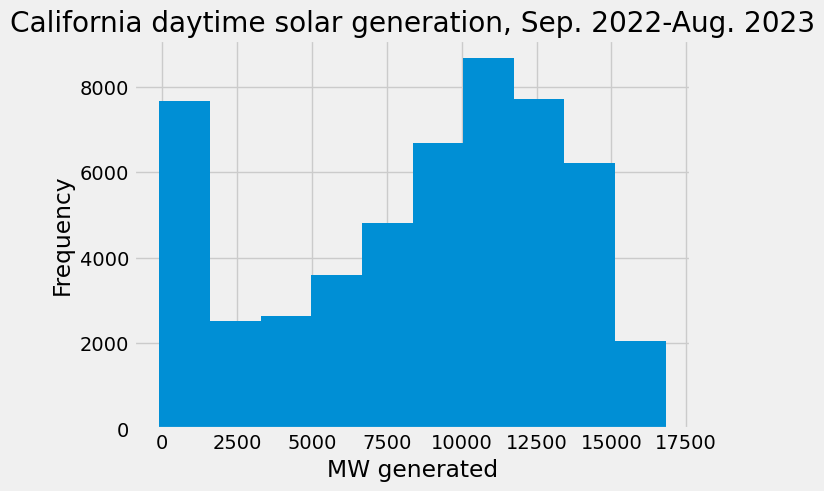

In [28]:
# Run this cell to plot a histogram of daytime solar energy generation in 2022-23
plt.hist(caiso_solar["Solar"])
plt.title("California daytime solar generation, Sep. 2022-Aug. 2023")
plt.ylabel("Frequency")
plt.xlabel("MW generated")
plt.show()

It looks like many zero or near-zero values are still present, but we've managed to remove a large fraction of them. 

### Question 4.1.3 (2 points)
Our histogram isn't super informative. It might be more interesting to look at how the distribution of solar energy generation changes over the course of the year.<br>

In the cell below, we create a figure with 12 subplots:
* Each subplot shows the histogram distribution for one of the 12 months of the year. 
* The subplots are ordered chronologically (September 2022, October 2022, ..., August 2023). 
* Each subplot has a subtitle that includes the month and year of the observations.
* Each subplot has x-axis and y-axis labels.
<br>

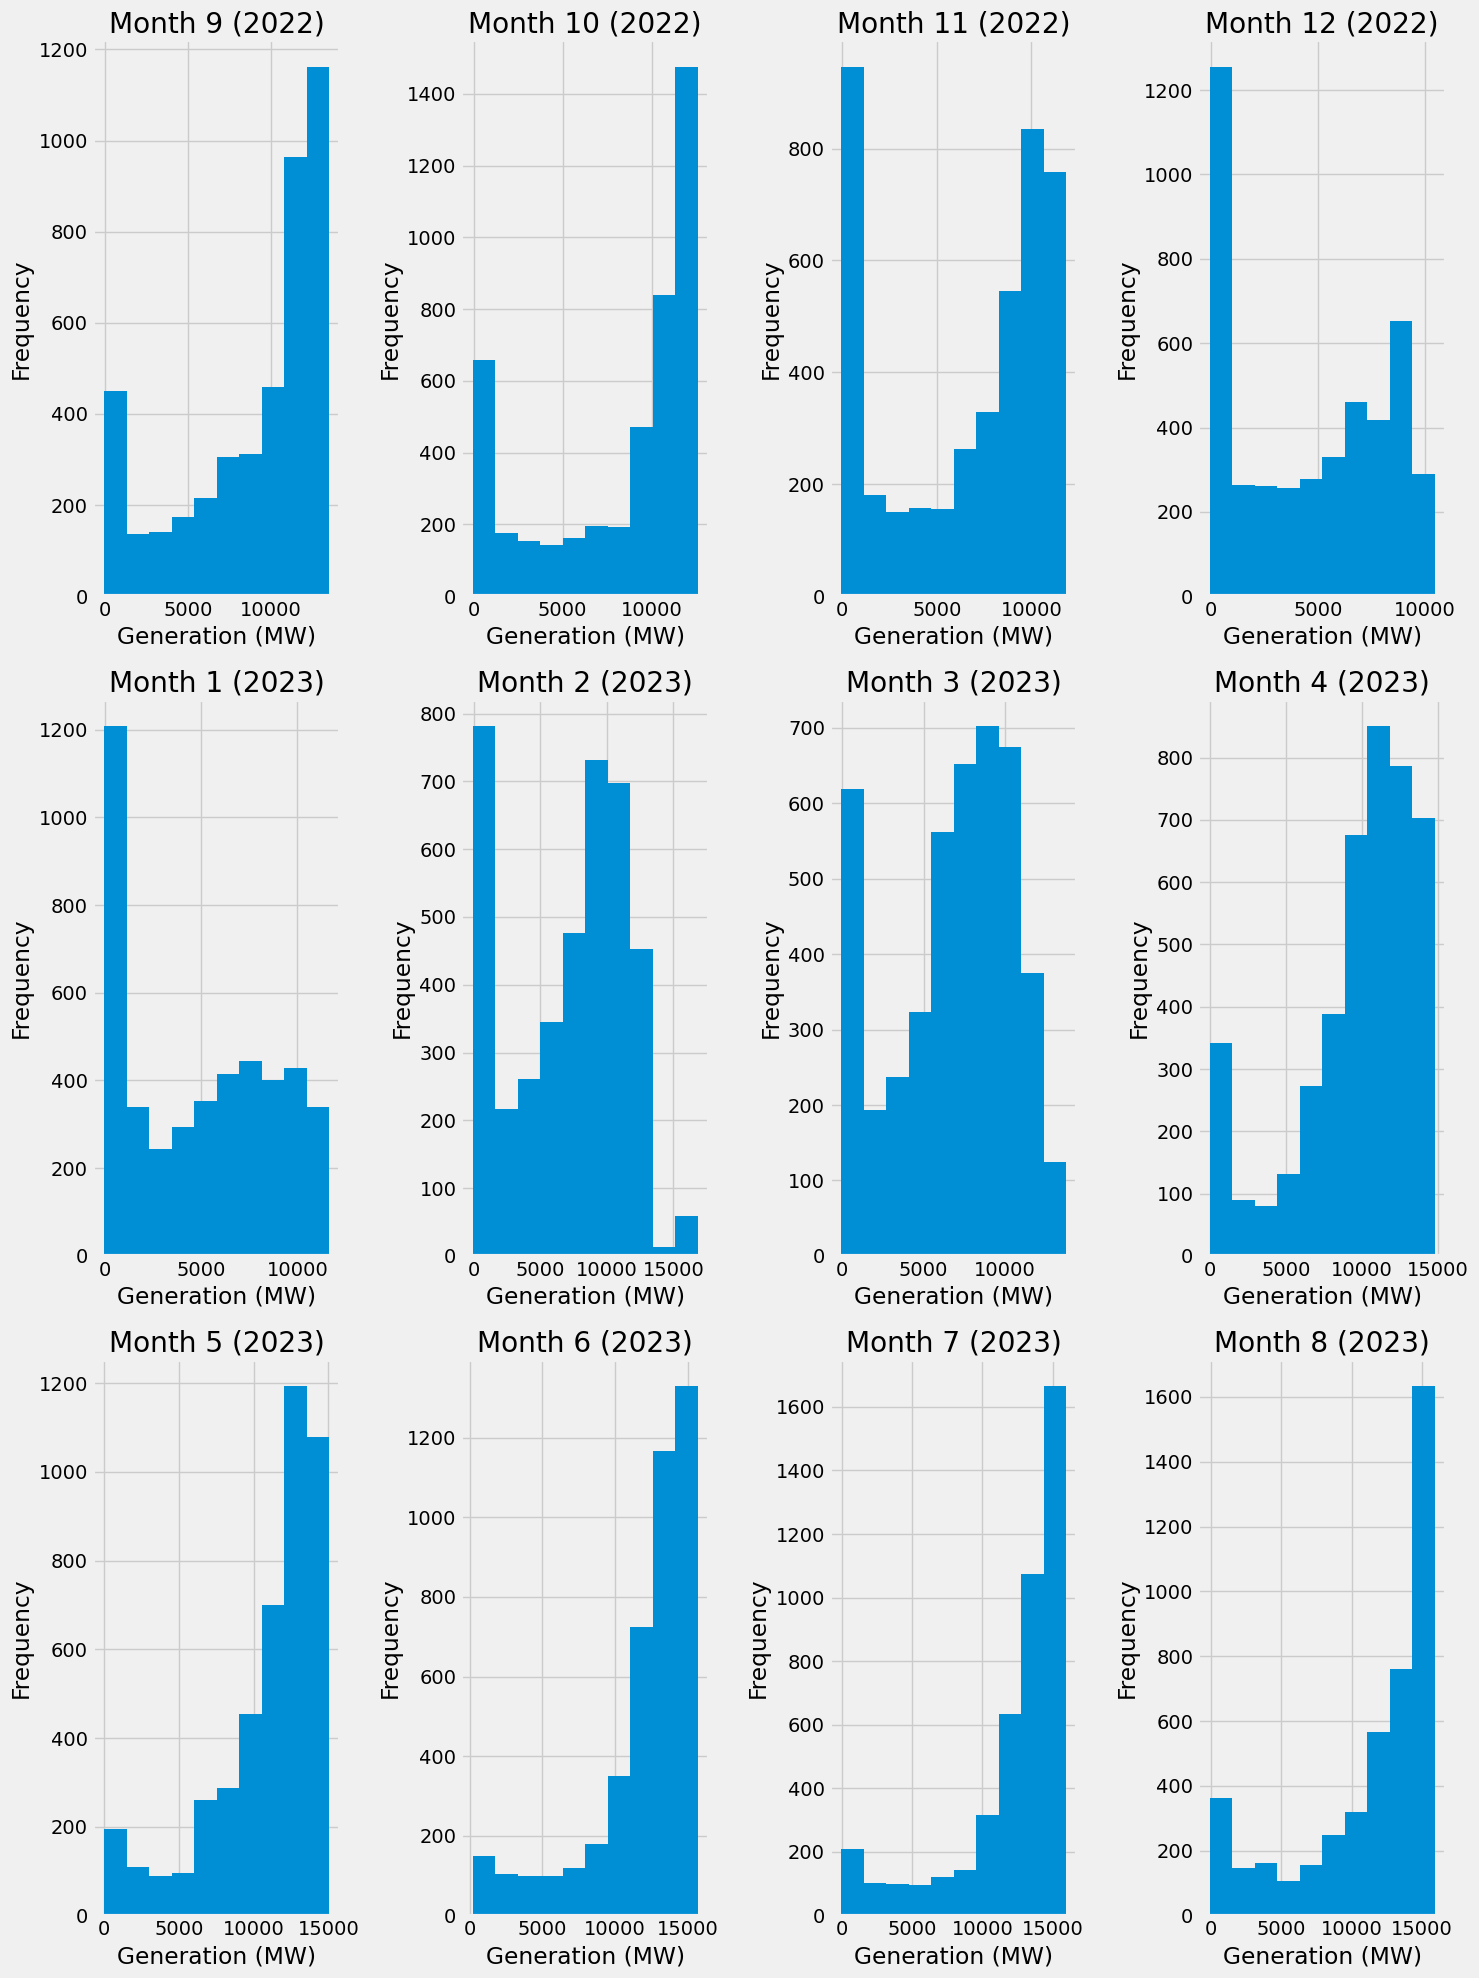

In [29]:
plt.figure(figsize=(15, 20))

for i in range(9,13):
    plt.subplot(3, 4, i-8)
    plt.hist(caiso_solar[caiso_solar["Month"] == i]["Solar"])
    plt.title("Month " + str(i) + ' (2022)')
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")

for i in range (1,9):
    plt.subplot(3, 4, 4+i)
    plt.hist(caiso_solar[caiso_solar["Month"] == i]["Solar"])
    plt.title("Month " + str(i) + ' (2023)')
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

What can you observe from the histograms, for example, about the monthly variability and magnitude of solar generation? Provide at least two observations that contrast the plots.

*Your answer here*

*SOLUTION*

Many answers are possible, as long as there are at least two distinct observations. Here are two such observations:
1. The most consistently high energy generation levels occurred in July and August 2022. 
2. November-January have a significant fraction of hours in the lowest generation bin (shortest days in winter). 

### Question 4.1.4 (1 point)
Unless you are ahead of the curve and already coded this into your plots, you probably have histograms that have different x and y axis scales. Copy and paste your code to generate the 12 subplots again, but this time call `plt.xlim()` and `plt.ylim()` to give all the plots the same axis scales (you will need to decide the appropriate scale for each axis).

In [30]:
# YOUR CODE HERE

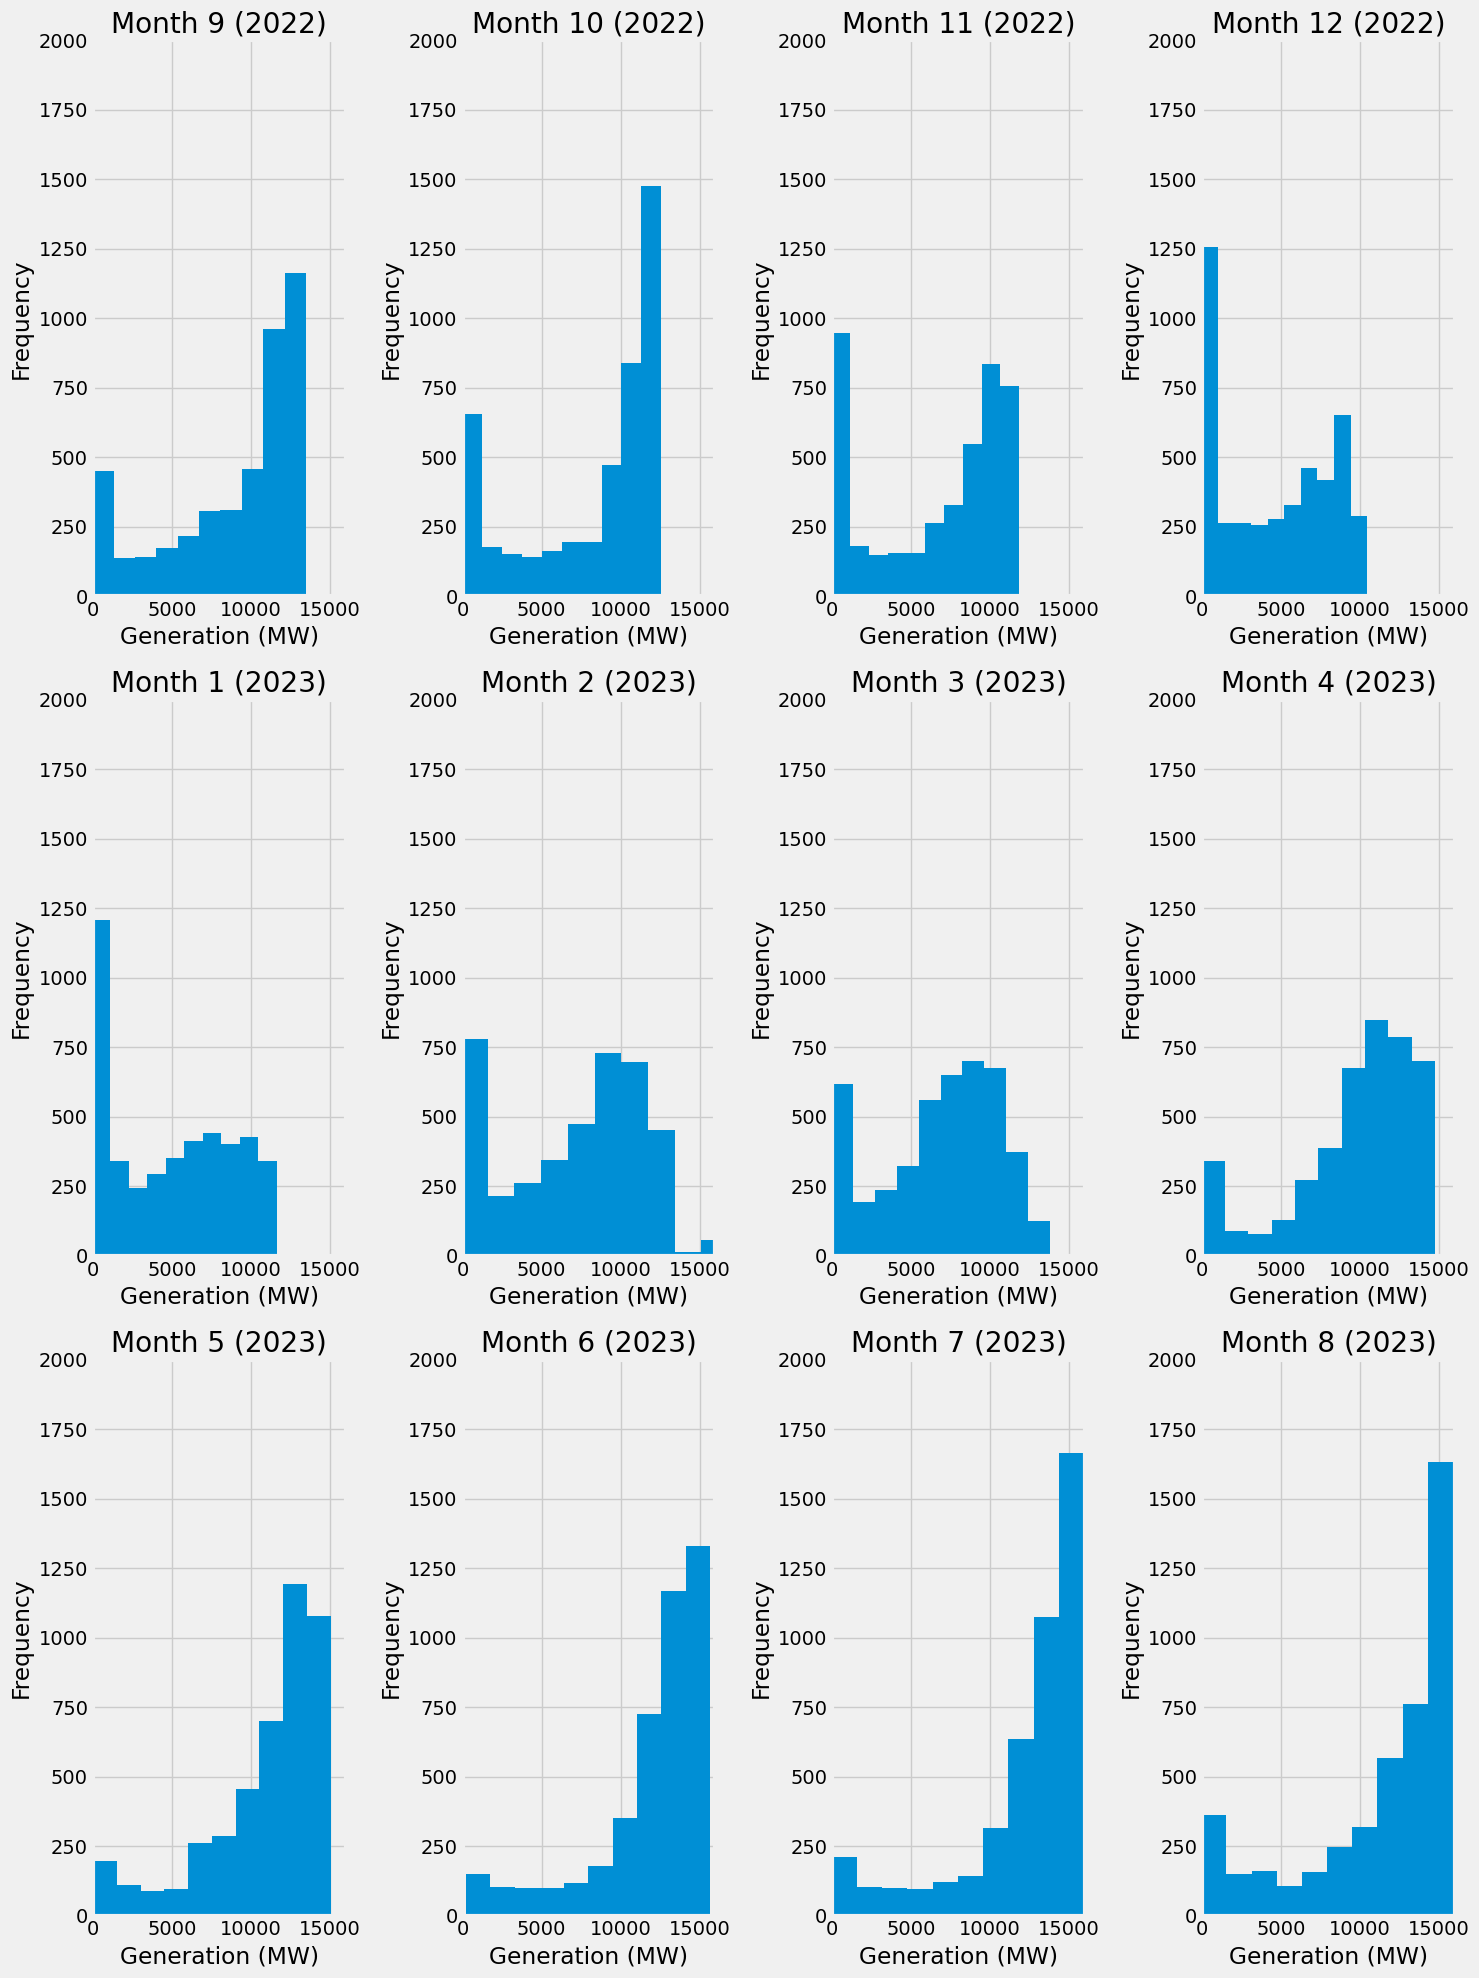

In [31]:
#SOLUTION 
plt.figure(figsize=(15, 20))

for i in range(9,13):
    plt.subplot(3, 4, i-8)
    plt.hist(caiso_solar[caiso_solar["Month"] == i]["Solar"],bins=10)
    plt.title("Month " + str(i) + ' (2022)')
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")
    plt.xlim(0,16000)
    plt.ylim(0,2000)


for i in range (1,9):
    plt.subplot(3, 4, 4+i)
    plt.hist(caiso_solar[caiso_solar["Month"] == i]["Solar"],bins=10)
    plt.title("Month " + str(i) + ' (2023)')
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")
    plt.xlim(0,16000)
    plt.ylim(0,2000)

plt.tight_layout()
plt.show()


### Question 4.1.5 (2 points)
Do you notice anything new when you re-scale the axes? Do the trends shown over the different months make sense to you?  Provide two additional observations that are more noticeable here than in the prior plots.

*YOUR ANSWER HERE*

*SOLUTION*

Many answers are possible. An acceptable answer might make the following observations:

1. Lowest generation, and least variation in generation levels across time of day, occurs in December
2. Most high MW generation days occur in June, July and August. 

### Seaborn and KDEs
**Seaborn** is a Python data visualization library that is built on top of matplotlib. It offers a higher level of abstraction and better-looking graphics.<br>

Below is a histogram plotted using seaborn. Because of its higher level of abstraction, seaborn can plot elements on a graph that would usually require extra calculation using our usual libraries (e.g., a linear regression line; or the kernel density estimation curve overlayed on the top of this histogram). A great option for plotting a univariate distribution of observations is seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html), which combines matplotlib histogram with seaborn kde and rugplot. 

Note that the KDE plot normalizes the data so that the frequency of observations lie between 0 and 1. It also represents the distribution of a set of data, with [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother).

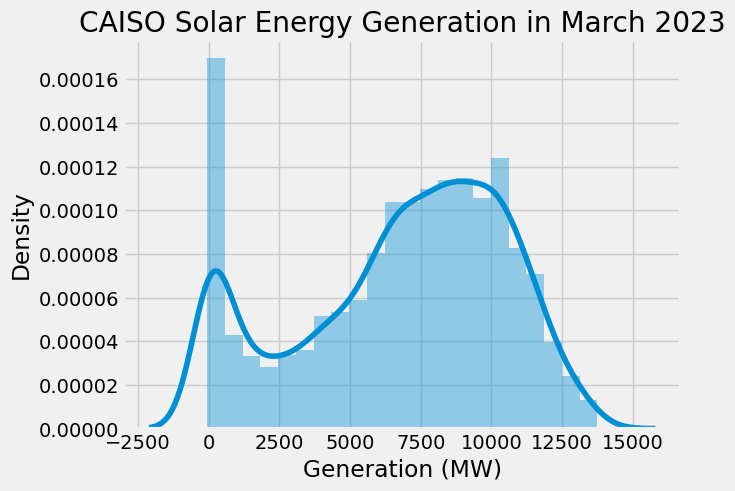

In [32]:
# Run this example seaborn plot
sns.distplot(caiso_solar.loc[caiso_solar['Month']==3]["Solar"])
plt.title("CAISO Solar Energy Generation in March 2023")
plt.xlabel("Generation (MW)")
plt.ylabel("Density")
plt.show()

### Question 4.2.1 (2 points)

The plot above gives us the histogram and KDE for the month of February, but as we know from earlier in the homework assignment, there's quite a bit of variation from month to month. Use sns.distplot() to plot only the KDEs (not the histograms) of solar energy generation for each month. You should end up with 12 different curves (one for each month) all on the same plot. 

Make sure to include a legend, title, and axis labels. Consult the [documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) if necessary. In this case, there's no need to differentiate between 2022 and 2023. Your legend can differentiate the curves simply by month.<br>

A for loop will be helpful here again - as with previous problems, you may want to use `plt.figure()` to establish your figure area, and then call `sns.distplot()` within a for loop.  

In [33]:
# YOUR CODE HERE

#Skeleton
# plt.figure(...)

# for i in range(...):
#     sns.distplot(...)

# plt.legend()
# plt.title(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.show()

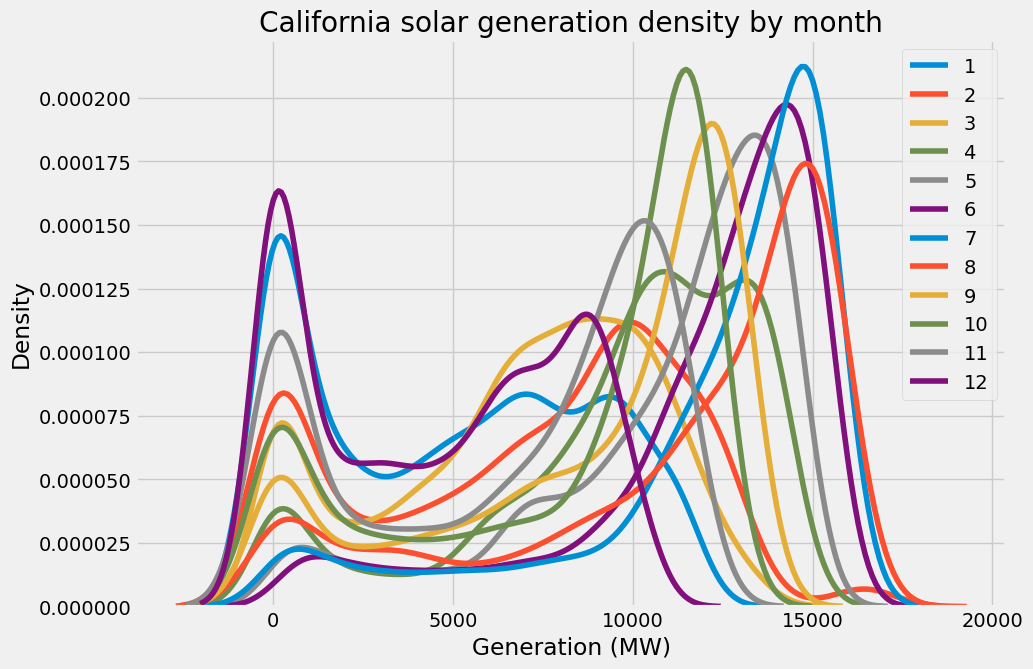

In [34]:
# SOLUTION
plt.figure(figsize=(10, 7))

for i in range(1,13):
    sns.distplot(caiso_solar[caiso_solar["Month"] == i]["Solar"], 
                 hist=False, kde=True, label=i)

plt.legend()
plt.title("California solar generation density by month")
plt.xlabel("Generation (MW)")
plt.ylabel("Density");

The default color palette that seaborn used for our kernel density plot is a little confusing - it's hard to keep track of 12 different lines on one graph, especially since some of the colors are used more than once! One thing we can do to make the plot more digestible is to use a sequential color palette, so that each month is plotted as a different shade of the same color.<br>

One way to get a sequential color palette in Python is to use the [`sns.cubehelix_palette()`](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html) function. The output of this function is an array of RGB values, each of which represents a different color on a sequential spectrum. If you run the code below, you'll get an array of 6 lists, each of which contains the RGB values for a different color. You can also try to modify the default arguments, like `start = `, that are outlined in the function documentation. If you run the second cell below, you can preview your color palette using `sns.palplot()`.<br>

In [35]:
# run this cell to generate a color palette and save the RGB values to test_palette
test_palette = sns.cubehelix_palette(6)

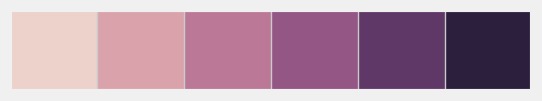

In [36]:
# run this cell to preview the colors in the palette you just defined, test_palette
sns.palplot(test_palette)

### Question 4.2.2 (1 point)
In the empty code cell block below, define a palette using `sns.cubehelix_palette()` that contains a number of colors equal to the number of lines that you'll be plotting, and then modify your code for generating the KDE plots so that the color of your lines **get lighter as the months increase from 1 (January) to 12 (December).** The result should be a plot with 12 KDE curves, each plotted in a different shade of the same color. To achieve this, you'll want to use the `color = ` argument within `sns.distplot()`.

In [37]:
# YOUR CODE HERE

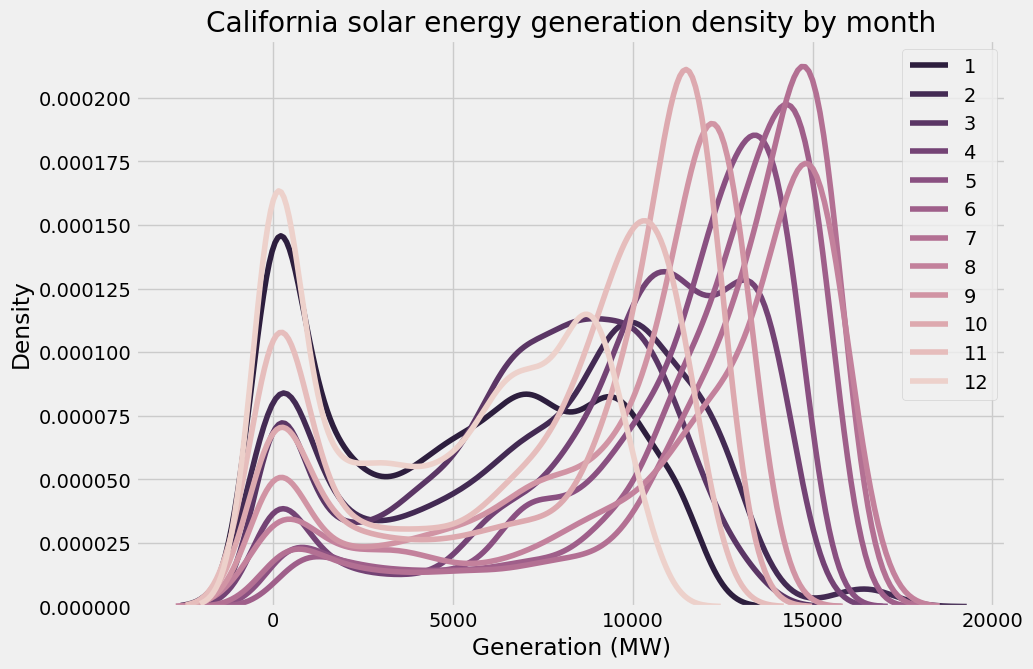

In [38]:
# SOLUTION
plt.figure(figsize=(10, 7))

palette = sns.cubehelix_palette(12)
# palette = sns.diverging_palette(15,275,n=12)

for i in range(1,13):
    sns.distplot(caiso_solar[caiso_solar["Month"] == i]["Solar"], 
                 hist=False, kde=True, label=i, color = palette[12-i])

plt.legend()
plt.title("California solar energy generation density by month")
plt.xlabel("Generation (MW)")
plt.ylabel("Density");

### Question 4.2.3 (1 point)
Do you observe anything new from your latest KDE plot with a sequential color palette that wasn't as obvious from the histograms or the first KDE plot?

*Your answer here*

*SOLUTION*

There are many possible responses. If they make any observation they can get credit. 

### Question 4.2.4 (1 point)

Why would it be advantageous to only plot the KDE instead of the histogram?

*Your answer here*

*SOLUTION*
*Possible answers: can layer multiple plots; can better capture continuity of data since it isn't binned*

### Box Plots

### Question 4.3.1 (2 points)

Back to our `caiso_22_23` DataFrame, and back to matplotlib! Using `pd.DataFrame.boxplot()` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)), plot the distribution of generation over the year for solar energy, wind, geothermal, biomass, biogas, and small hydro side by side. Make sure to add a title and label axes.

*Hint*: if you want to use `pd.DataFrame.boxplot()` to make three side-by-side boxplots for columns named `Col1`, `Col1` and `Col1` in a dataframe called `my_df`,  you can use the syntax `my_df.boxplot(['Col1', 'Col2', 'Col3'])`.

In [39]:
# YOUR CODE HERE

# SKELETON
# fig = plt.figure(1, figsize=(9, 6))
# ax = fig.add_subplot(111)
# caiso_22_23.boxplot(...)
# ax.set_xticklabels(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.title(...)
# plt.show()

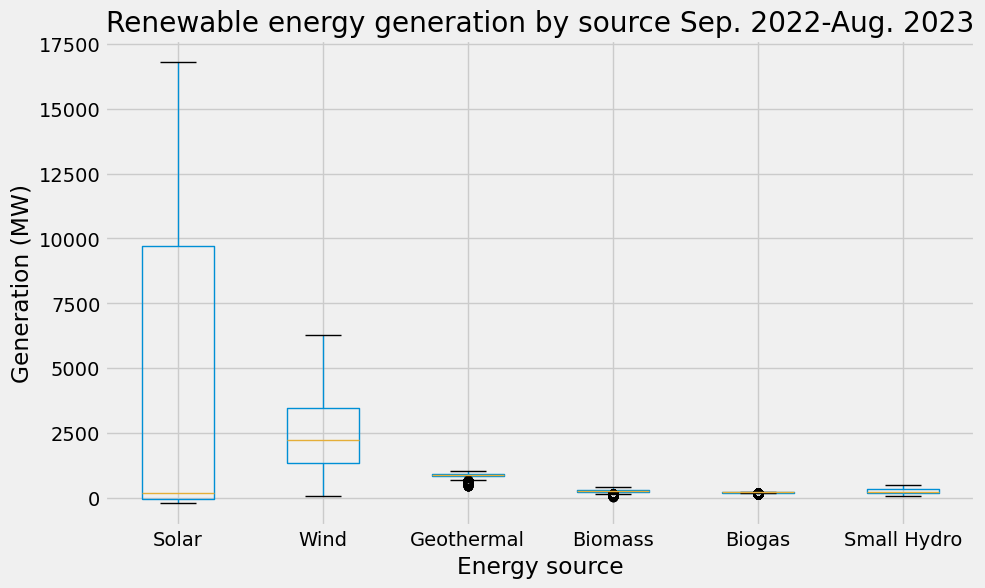

In [40]:
# SOLUTION

fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
caiso_22_23.boxplot(['Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas','Small hydro'])
ax.set_xticklabels(['Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas','Small Hydro'])
plt.xlabel("Energy source")
plt.ylabel("Generation (MW)")
plt.title("Renewable energy generation by source Sep. 2022-Aug. 2023")
plt.show()

### Question 4.3.2 (1 point)
What can you observe from the box plot above? Which energy source produces the most electricity on average? Which exhibits the most variation? 

*Your answer here*

*EXAMPLE SOLUTION*

* Looking at the mean values in the box plots, we can see that wind has the highest mean 5-min-ly generation (~2000MW).
* The most variable energy sources is solar PV; it's interquartile range stretches from 0 to >9,000 MW, 
* a much larger spread by far compared to the other resources.

One thing we notice from our box plot is that the different energy sources generate energy at completely different scales, since there are different installed capacities (and capacity factors) of each resource. To get a better sense of distribution, we can try normalizing generation against the installed capacity of each energy source (capacity is a MW value that tells us the maximum amount of each resource that is available). That is, instead of plotting the distribution of geothermal generation, we can plot the distribution of the ratio of geothermal generation to its installed capacity in California, and we can do the same for the other resources.<br>

According to [CAISO](http://www.caiso.com/informed/Pages/CleanGrid/default.aspx), as of September 2022, the installed capacity for biofuels is 804 MW, for geothermal energy is 1,465 MW; for small hydro is 1,182 MW; for solar is 15,608 MW; and for wind is 7,956 MW.<br>

### Question 4.3.3 (1 point)
To match the CAISO installed capacity categories, add a new summary columns to `caiso_22_23`: a `Biofuels` column that is the sum of generation from biomass and biogas for each 5 minute interval.

In [41]:
# YOUR CODE HERE
caiso_22_23['Biofuels'] = ...

In [42]:
# SOLUTION
caiso_22_23['Biofuels'] = caiso_22_23['Biomass'] + caiso_22_23['Biogas']
caiso_22_23.head()

,Date,Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,Batteries,Imports,Other,DateTime,Month,Year,Biofuels
0,2022-09-01,00:00,0.0,2516.0,873.0,342.0,205.0,206.0,5.0,2263.0,15538.0,2480.0,-314.0,7783.0,0.0,2022-09-01 00:00:00,9,2022,547.0
1,2022-09-01,00:05,-1.0,2517.0,872.0,341.0,205.0,213.0,6.0,2264.0,15737.0,2393.0,-264.0,7666.0,0.0,2022-09-01 00:05:00,9,2022,546.0
2,2022-09-01,00:10,4.0,2528.0,873.0,338.0,205.0,217.0,6.0,2264.0,15842.0,2484.0,-28.0,7544.0,0.0,2022-09-01 00:10:00,9,2022,543.0
3,2022-09-01,00:15,0.0,2553.0,873.0,340.0,204.0,214.0,5.0,2263.0,15359.0,2635.0,258.0,6938.0,0.0,2022-09-01 00:15:00,9,2022,544.0
4,2022-09-01,00:20,0.0,2568.0,872.0,338.0,202.0,213.0,4.0,2263.0,15345.0,2619.0,377.0,6660.0,0.0,2022-09-01 00:20:00,9,2022,540.0


### Question 4.3.4 (2 points)
Using the code from the boxplot above as a starting point, normalize (i.e. divide) the energy generation values for biofuels, geothermal, small hydro, solar, and wind energy by their respective installed capacities. Plot these; this is a rough estimate of the ratio of the total capacity that is being utilized, i.e., the capacity factor.

In [43]:
# Create two lists with the column names and the capacity values
cols = ['Biofuels', 'Geothermal', 'Small hydro', 'Solar', 'Wind']
caps = [804, 1465, 1182, 15608, 7956]

# Create a new DataFrame with the normalized generation values
caiso2 = caiso_22_23
caiso2[cols] = caiso_22_23[cols].values # fix this line so it returns the normalized values (hint: divide by caps)

# Create the plot
# YOUR CODE HERE

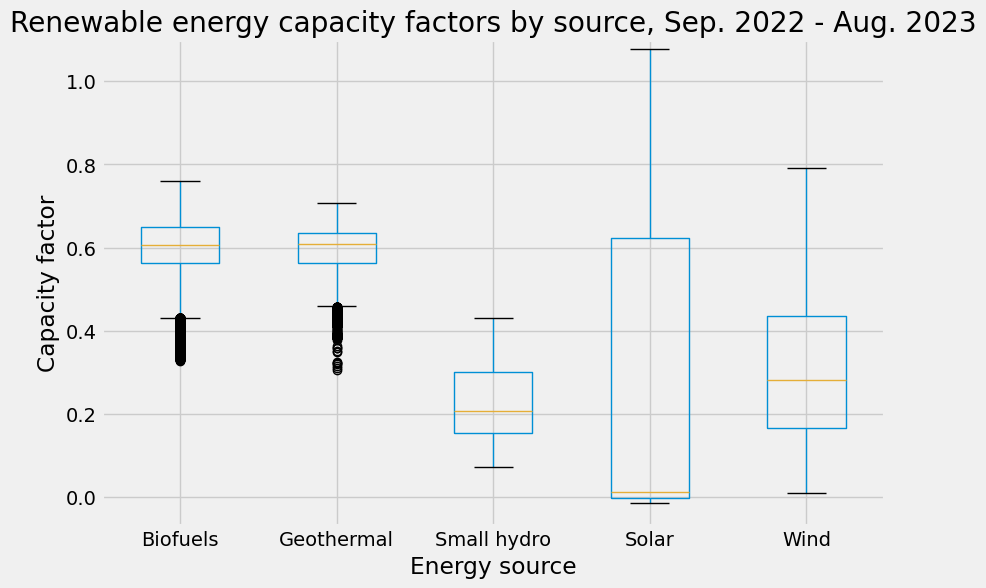

In [44]:
# SOLUTION

# Create two lists with the column names and the capacity values
cols = ['Biofuels', 'Geothermal', 'Small hydro', 'Solar', 'Wind']
caps = [804, 1465, 1182, 15608, 7956]

# Create a new DataFrame with the normalized generation values
caiso2 = caiso_22_23.copy()
caiso2[cols] = caiso_22_23[cols].values / caps

# Create the plot
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
caiso2.boxplot(cols)
ax.set_xticklabels(cols);
plt.xlabel("Energy source")
plt.ylabel("Capacity factor")
plt.ylim(top = 1.1)
plt.title("Renewable energy capacity factors by source, Sep. 2022 - Aug. 2023")
plt.show()

<br>

---

## Section 5: Scatter Plots<a id='scatter'></a>

In this section, we will look at renewable energy generation trends over time using scatter plots.<br>

### Question 5.1 (2 points)
Create a scatter plot that shows the date on the x-axis, and the total **solar PV and wind** generation (i.e. the sum of generation values from these two sources at each time period) on the y-axis. Make sure to label the title and axes, and make sure the y-axis starts at 0. You can find the documentation for plt.scatter() [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). You can also play around with the marker colour and size to get a plot that looks better than the default layout. 

In [45]:
# YOUR CODE HERE

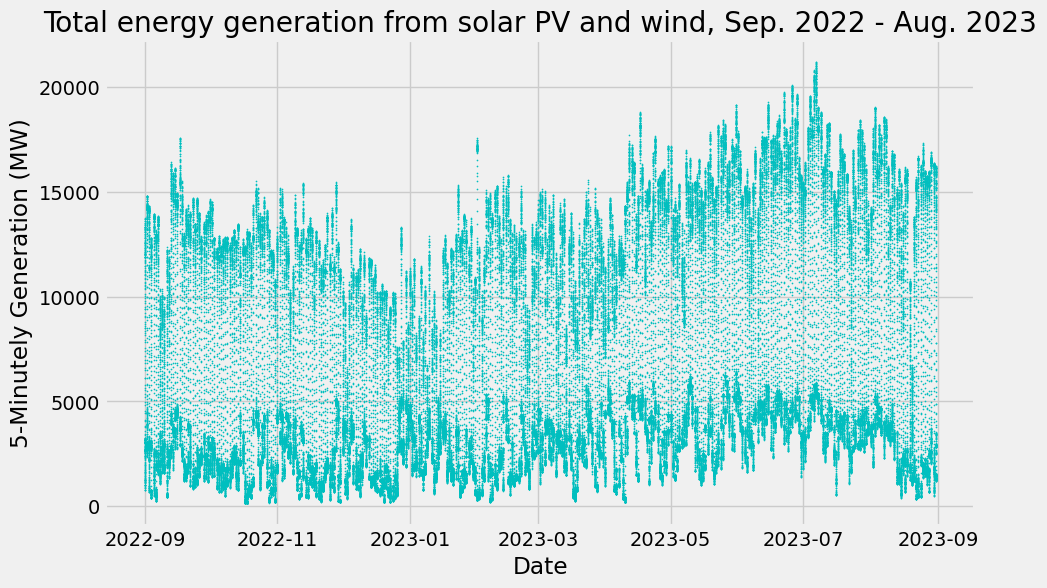

In [46]:
# SOLUTION
plt.figure(figsize = (10,6))
plt.scatter(caiso_22_23['Date'], caiso_22_23['Solar'] + caiso_22_23['Wind'], s = 0.5, color = 'c')
plt.title("Total energy generation from solar PV and wind, Sep. 2022 - Aug. 2023")
plt.xlabel("Date")
plt.ylabel("5-Minutely Generation (MW)")
plt.show()

### Question 5.2 (4 points)
In this section, plot a **scatter plot of your choice** using this assignment's energy generation data. The only restrictions are that your plot should show **at least two different series (e.g. two different columns of data).**<br>

If you want an idea of where to get started, you can try plotting generation values for different resources as a function of date, or thinking of different ways to summarize the generation data (e.g., you could find hourly or daily generation means).<br>

As always, make sure to add a title and axis labels, and set the y- and x-axis range to values that make sense for the plot. You should also choose an appropriate color scheme and other design elements (like marker size or shape).<br>

In the markdown cell below, provide a 1-3 sentence justification of your choice of data and design elements. What are you trying to convey, and how did you format your plot to convey that message?

In [47]:
# YOUR CODE HERE


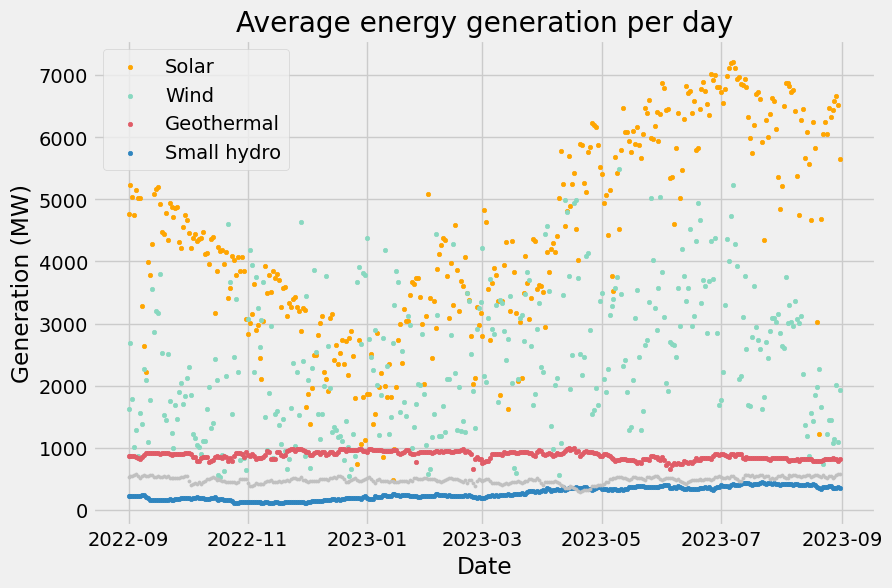

In [48]:
# one possible approach
means = caiso_22_23.groupby('Date').mean(['Geothermal','Small hydro','Solar','Wind'])

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

for i in [0,1,2,5,15]:
    color = 'silver'
    label = None
    size = 5
    if means.columns[i] == 'Geothermal':
        color = '#E05C67'
        label = 'Geothermal'
        size = 10
    elif means.columns[i] == 'Small hydro':
        color = '#2F85BF'
        label = 'Small hydro'
        size = 10
    elif means.columns[i] == 'Solar':
        color = '#FFA500'
        label = 'Solar'
        size = 10
    elif means.columns[i] == 'Wind':
        color = '#88d8c0'
        label = 'Wind'
        size = 10
    ax.scatter(means.index, means.iloc[:,i], s = size, label = label, color = color)
    
plt.title("Average energy generation per day")
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.legend()
plt.show()

*YOUR ANSWER HERE*

*Example Solution:* When I plotted the data with a different colour for each source, I found that only wind and solar PV really varied with time and were also driving the trend in increasing renewable generation in the summer. I decided to highlight those two resources so that their trend in generation was apparent, and grey out all other renewable sources.

----

## Submission

Congrats, you're done with homework 4!

Before you submit, click **Kernel** --> **Restart Kernel and Run All Cells...**. Then, go to the toolbar and click **File** -> **Save and Export Notebook As...** -> **HTML**, then submit this assignment through bCourses.

----

## Bibilography
+ CAISO - Renewables Reporting Data. http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx
+ Seaborn - Distplot. https://seaborn.pydata.org/generated/seaborn.distplot.html
+ Matplotlib. https://matplotlib.org
+ Knowledge Stockpile - Creating boxplots with Matplotlib. http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

<hr/>
Notebook developed by: Rebekah Tang

Revised by: Dawson Verley

Data Science Modules: http://data.berkeley.edu/education/modules